In [75]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale


In [76]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [77]:
'''df_target=df.drop(['area_type','availability','location','size','society',
                  'total_sqft','bath','balcony'],axis=1)
df_target.head()'''


"df_target=df.drop(['area_type','availability','location','size','society',\n                  'total_sqft','bath','balcony'],axis=1)\ndf_target.head()"

In [78]:
'''df_input=df.drop(['price'],axis=1)
df_input.head()'''

"df_input=df.drop(['price'],axis=1)\ndf_input.head()"

In [79]:
'''df_input.isnull().sum()'''

'df_input.isnull().sum()'

In [168]:
df_bath=pd.DataFrame(df['bath'])
df_bath.isnull().sum()

bath    73
dtype: int64

In [174]:
df_balcony=pd.DataFrame(df['balcony'])
df_balcony.head()

,balcony
0,1.0
1,3.0
2,3.0
3,1.0
4,1.0


In [175]:
df_bath_bal=pd.concat([df_bath,df_balcony],axis=1)
df_bath_bal.head(10)

,bath,balcony
0,2.0,1.0
1,5.0,3.0
2,2.0,3.0
3,3.0,1.0
4,2.0,1.0
5,2.0,1.0
6,4.0,NaN
7,4.0,NaN
8,3.0,1.0
9,6.0,NaN


In [176]:
df_fillna=df_bath_bal.fillna(0,axis=1)
df_fillna.shape

(13320, 2)

In [177]:
df.shape

(13320, 9)

In [178]:
df_fillna.isnull().sum()

bath       0
balcony    0
dtype: int64

In [179]:
df_fillna.tail()

,bath,balcony
13315,4.0,0.0
13316,5.0,0.0
13317,2.0,1.0
13318,4.0,1.0
13319,1.0,1.0


In [180]:
df_dropped=df.drop(['bath','balcony'],axis=1)
df_dropped.head()

,area_type,availability,location,size,society,total_sqft,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,51.00


In [181]:
df_new=pd.concat([df_dropped,df_fillna],axis=1)
df_new.tail()


,area_type,availability,location,size,society,total_sqft,price,bath,balcony
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,231.0,4.0,0.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,400.0,5.0,0.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,60.0,2.0,1.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,488.0,4.0,1.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,17.0,1.0,1.0


In [182]:
df_new.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
price              0
bath               0
balcony            0
dtype: int64

In [183]:
df['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [184]:
df_final=df_new.drop(['society'],axis=1)
df_final.head()

,area_type,availability,location,size,total_sqft,price,bath,balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,39.07,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,120.00,5.0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,62.00,2.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,95.00,3.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,51.00,2.0,1.0


In [185]:
df_final.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
price            0
bath             0
balcony          0
dtype: int64

In [186]:
df_final.dropna(subset=['location'],inplace=True)

In [187]:
df_final.isnull().sum()

area_type        0
availability     0
location         0
size            16
total_sqft       0
price            0
bath             0
balcony          0
dtype: int64

In [188]:
df_final['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [189]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13319 non-null  object 
 1   availability  13319 non-null  object 
 2   location      13319 non-null  object 
 3   size          13303 non-null  object 
 4   total_sqft    13319 non-null  object 
 5   price         13319 non-null  float64
 6   bath          13319 non-null  float64
 7   balcony       13319 non-null  float64
dtypes: float64(3), object(5)
memory usage: 936.5+ KB


In [190]:
df_f=df_final.dropna()

In [191]:
df_f.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
price           0
bath            0
balcony         0
dtype: int64

In [192]:
df_f['bhk']=df_f['size'].apply(lambda x: int(x.split(' ')[0]))


<ipython-input-192-4663edd41c19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['bhk']=df_f['size'].apply(lambda x: int(x.split(' ')[0]))


In [193]:
df_f.head()

,area_type,availability,location,size,total_sqft,price,bath,balcony,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,39.07,2.0,1.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,120.00,5.0,3.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,62.00,2.0,3.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,95.00,3.0,1.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,51.00,2.0,1.0,2


In [194]:
df_f['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [195]:
df_f[df_f['bhk']>20]

,area_type,availability,location,size,total_sqft,price,bath,balcony,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,230.0,27.0,0.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,660.0,40.0,0.0,43


In [196]:
#here it seems that 4684 has error as 43 bedrooms has only 2400 sqr_ft

In [197]:
df_f['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [198]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [199]:
df_f[~df_f['total_sqft'].apply(is_float)].head(10) #nagate values 

,area_type,availability,location,size,total_sqft,price,bath,balcony,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,186.000,4.0,0.0,4
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3010 - 3410,192.000,0.0,0.0,4
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,2957 - 3450,224.500,0.0,0.0,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,477.000,4.0,0.0,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,54.005,2.0,0.0,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,43.490,2.0,0.0,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,56.800,2.0,0.0,2
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,1520 - 1740,74.820,0.0,0.0,3
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,18.500,1.0,0.0,1
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,1195 - 1440,63.770,2.0,0.0,2


In [200]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [201]:
df_f_2=df_f.copy()
df_f_2['total_sqft']=df_f['total_sqft'].apply(convert_sqft_to_num)
df_f_2.head()

,area_type,availability,location,size,total_sqft,price,bath,balcony,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,39.07,2.0,1.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,120.00,5.0,3.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,62.00,2.0,3.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,95.00,3.0,1.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,51.00,2.0,1.0,2


In [202]:
df2=df_f_2.copy()
df2['price_per_sqft']=df_target['price']*100000/df2['total_sqft']
df2.head()

,area_type,availability,location,size,total_sqft,price,bath,balcony,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,39.07,2.0,1.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,120.00,5.0,3.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,62.00,2.0,3.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,95.00,3.0,1.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,51.00,2.0,1.0,2,4250.000000


In [203]:
df2['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [204]:
len(df2['location'].unique())

1304

In [205]:
#using one hot encoding is not accurate here thus using other location 


In [206]:
df2['location']=df2['location'].apply(lambda x: x.strip())
#Remove spaces at the beginning and at the end of the string

In [207]:
location_stats=df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           540
Sarjapur  Road       397
Electronic City      304
Kanakpura Road       273
Thanisandra          237
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [208]:
len(location_stats[location_stats<=10])

1052

In [209]:
location_stats_less_then_10=location_stats[location_stats<=10]
location_stats_less_then_10

location
Nagappa Reddy Layout     10
Sector 1 HSR Layout      10
1st Block Koramangala    10
Naganathapura            10
Nagadevanahalli          10
                         ..
LIC Colony                1
Kuvempu Layout            1
Kumbhena Agrahara         1
Kudlu Village,            1
1 Annasandrapalya         1
Name: location, Length: 1052, dtype: int64

In [210]:
df2['location']=df2['location'].apply(lambda x: 'other' if x in location_stats_less_then_10 else x)
len(df2['location'].unique()) #now we have only 242 coloumns for one hot encoding 

242

In [211]:
df2.head(10)

,area_type,availability,location,size,total_sqft,price,bath,balcony,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,39.07,2.0,1.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,120.00,5.0,3.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,62.00,2.0,3.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,95.00,3.0,1.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,51.00,2.0,1.0,2,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,38.00,2.0,1.0,2,3247.863248
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732.0,204.00,4.0,0.0,4,7467.057101
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300.0,600.00,4.0,0.0,4,18181.818182
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310.0,63.25,3.0,1.0,3,4828.244275
9,Plot Area,Ready To Move,other,6 Bedroom,1020.0,370.00,6.0,0.0,6,36274.509804


In [212]:
df2[(df2['total_sqft']/df2['bhk'])<300].head()

,area_type,availability,location,size,total_sqft,price,bath,balcony,bhk,price_per_sqft
9,Plot Area,Ready To Move,other,6 Bedroom,1020.0,370.0,6.0,0.0,6,36274.509804
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600.0,200.0,9.0,0.0,8,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,150.0,4.0,1.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,85.0,7.0,0.0,8,6296.296296
70,Plot Area,Ready To Move,other,3 Bedroom,500.0,100.0,3.0,2.0,3,20000.000000


In [213]:
len(df2[df2['total_sqft']/df2['bhk']<300])

744

In [214]:
#df3=df2.drop(labels=[df2[df2['total_sqft']/df2['bhk']<300]],axis=0)
df3=df2[~(df2['total_sqft']/df2['bhk']<300)] #thiis is a simpler way to filter out outliers using negate ftn 

In [215]:
df2.shape

(13303, 10)

In [216]:
df3.shape

(12559, 10)

In [217]:
df3['price_per_sqft'].describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [218]:
# max  - 176470.588235 is unlikely for a generic data 

In [219]:
def remove_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf['price_per_sqft'])
        st=np.std(subdf['price_per_sqft'])
        reduced_df=subdf[(subdf['price_per_sqft']>(m-st))&(subdf['price_per_sqft']>(m-st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [220]:
df4=remove_outlier(df3)
df4.shape

(11714, 10)

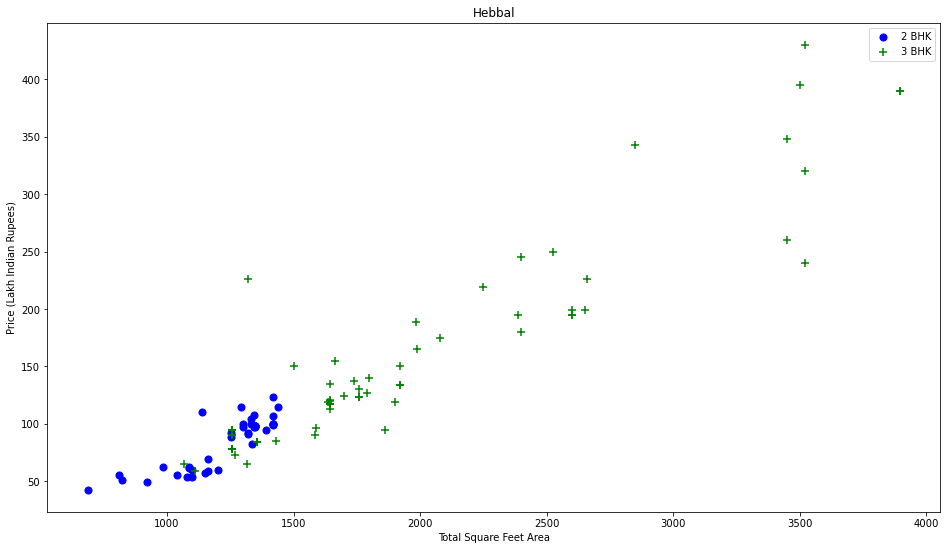

In [227]:
def plot_scatter(df,location):
    bhk2 = df[(df['location']==location) & (df['bhk']==2)]
    bhk3 = df[(df['location']==location) & (df['bhk']==3)]
    plt.figure(figsize=(16,9))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter(df4,"Hebbal")

In [224]:
#Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df5 = remove_bhk_outliers(df4)

df5.shape


(8020, 10)

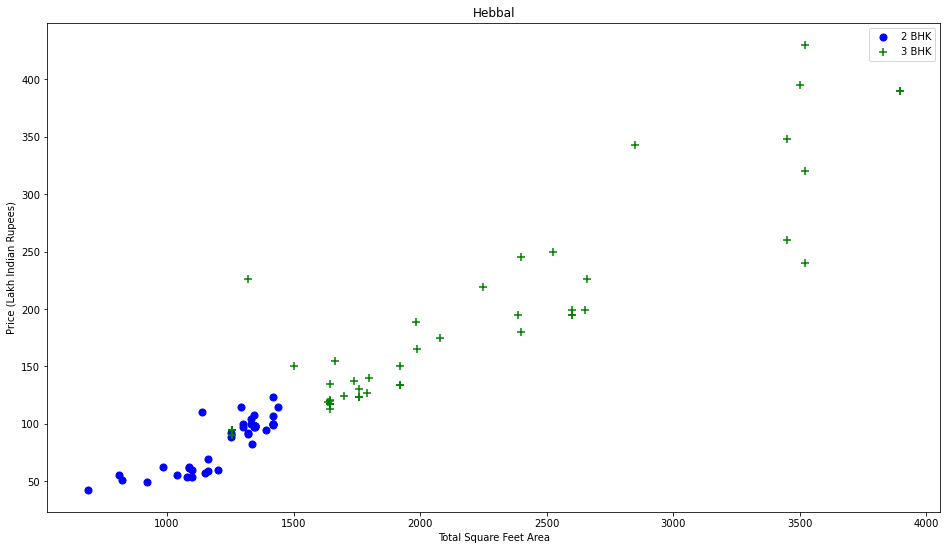

In [228]:
plot_scatter(df5,"Hebbal")

Text(0, 0.5, 'Count')

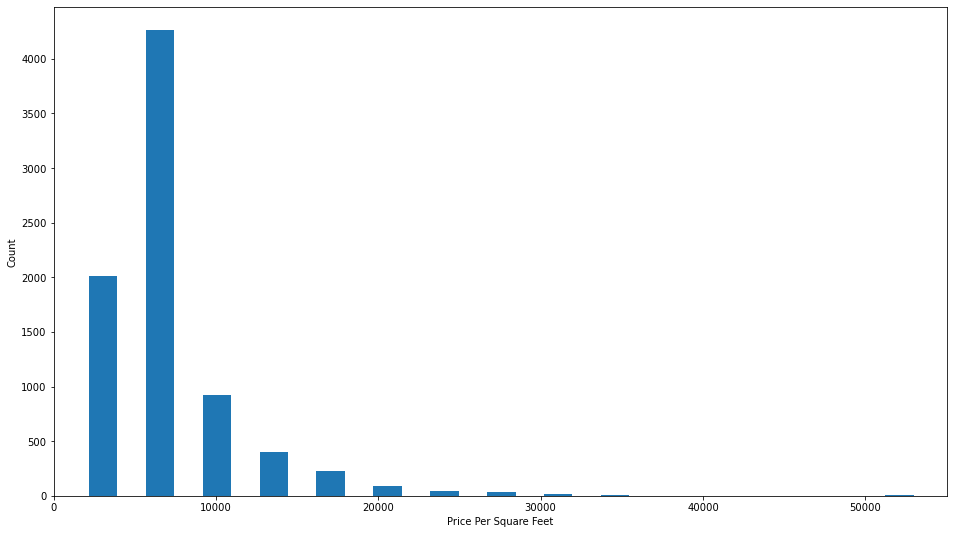

In [239]:
plt.figure(figsize=(16,9))
plt.hist(df5.price_per_sqft,rwidth=0.5,bins=50)
plt.xlim(xmin=0,xmax=55000)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [240]:
df5['bath'].unique()

array([ 4.,  3.,  2.,  5.,  7.,  1.,  8.,  6.,  0.,  9., 12., 14., 16.,
       13.])

In [242]:
len(df5[df5['bath']>10])

7

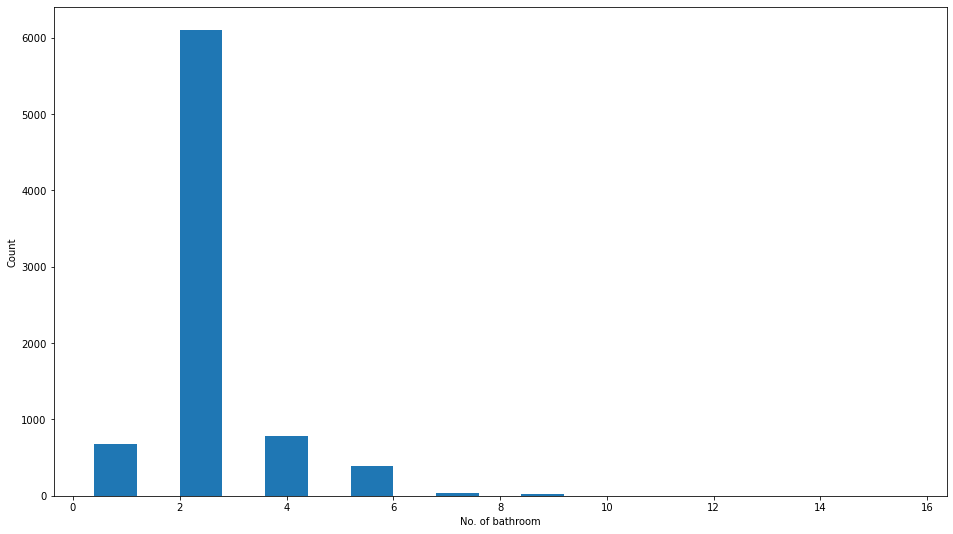

In [243]:
plt.figure(figsize=(16,9))
plt.hist(df5['bath'],rwidth=0.5)
plt.xlabel('No. of bathroom')
plt.ylabel('Count')
plt.show()

In [245]:
# we have outliers 
#as more then no. ofrooms if there are bathrroms then thats unusual thus considering only 2 more tham rooms 

In [249]:
df5.shape

(8020, 10)

In [246]:
df5[df5['bath']>df5['bhk']+2]

,area_type,availability,location,size,total_sqft,price,bath,balcony,bhk,price_per_sqft
1872,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460.0,80.0,7.0,2.0,4,3252.032520
6071,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000.0,450.0,8.0,0.0,4,6428.571429
6667,Super built-up Area,19-Jan,Rajaji Nagar,5 BHK,7500.0,1700.0,8.0,3.0,5,22666.666667
7779,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806.0,116.0,6.0,2.0,3,6423.034330
9383,Plot Area,Ready To Move,other,9 Bedroom,3300.0,500.0,14.0,0.0,9,15151.515152
11058,Plot Area,Ready To Move,other,3 Bedroom,2400.0,775.0,6.0,2.0,3,32291.666667
11552,Plot Area,Ready To Move,other,4 Bedroom,4350.0,2600.0,8.0,0.0,4,59770.114943
11658,Plot Area,Ready To Move,other,10 Bedroom,7150.0,3600.0,13.0,0.0,10,50349.650350


In [248]:
df6=df5[~(df5['bath']>df5['bhk']+2)]
df6.shape

(8012, 10)

In [252]:
df7=df6.drop(['price_per_sqft','size','availability'],axis=1)
df7.head()

,area_type,location,total_sqft,price,bath,balcony,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,428.0,4.0,1.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,194.0,3.0,2.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,235.0,2.0,3.0,3
3,Plot Area,1st Block Jayanagar,2400.0,450.0,4.0,2.0,4
4,Built-up Area,1st Block Jayanagar,1200.0,130.0,2.0,0.0,3


In [253]:
df7.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [254]:
#one hot encoding

In [257]:
df8=pd.get_dummies(df7)
df8.head(4)

,total_sqft,price,bath,balcony,bhk,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,428.0,4.0,1.0,4,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,194.0,3.0,2.0,3,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,235.0,2.0,3.0,3,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,450.0,4.0,2.0,4,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [268]:
df9=df8.drop(['location_other','area_type_Plot  Area'],axis=1)
df9.head()

,total_sqft,price,bath,balcony,bhk,area_type_Built-up Area,area_type_Carpet Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2850.0,428.0,4.0,1.0,4,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,194.0,3.0,2.0,3,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,235.0,2.0,3.0,3,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,450.0,4.0,2.0,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,130.0,2.0,0.0,3,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
df9.shape

(8012, 249)

In [273]:
df9_input=df9.drop(['price'],axis=1)
df9_input.head()

,total_sqft,bath,balcony,bhk,area_type_Built-up Area,area_type_Carpet Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2850.0,4.0,1.0,4,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,4.0,2.0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,0.0,3,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
df9_target=df9['price']
df9_target.head()

0    428.0
1    194.0
2    235.0
3    450.0
4    130.0
Name: price, dtype: float64

In [275]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df9_input,df9_target,test_size=0.2,random_state=10)

In [276]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.7309338789000848

In [280]:
#grid search cv

In [278]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)

cross_val_score(LinearRegression(),df9_input,df9_target,cv=cv)

array([0.73093388, 0.61976537, 0.77597083, 0.71371852, 0.67127557])

In [279]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(df9_input,df9_target)

,model,best_score,best_params
0,linear_regression,0.723792,{'normalize': False}
1,lasso,0.675819,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.557894,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [285]:
df9_input.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Super built-up  Area',
       'location_1st Block Jayanagar', 'location_1st Phase JP Nagar',
       'location_2nd Phase Judicial Layout',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=248)